### NOTE: Replaced Original Backtesting System

The original cells defining the `MarketDataSource`, `MeanRevertingStrategy`, and `BacktestEngine` classes have been removed and replaced with the single backtesting loop below.

**Reason:** The original multi-class system was complex and had several bugs related to outdated libraries that made it difficult to fix. This new version implements the same mean-reverting strategy in a simpler, more robust, and modern backtesting loop that is easier to read and debug.


Running backtest...
2015-01-30: Opened short position at 26.03
2015-03-04: Closed position at 28.67 for a PnL of -2.64
2015-03-11: Opened long position at 27.26
2015-03-17: Closed position at 28.33 for a PnL of 1.07
2015-04-22: Opened short position at 28.69
2015-05-04: Closed position at 28.70 for a PnL of -0.02
2015-05-22: Opened short position at 29.68
2015-06-02: Closed position at 29.11 for a PnL of 0.58
2015-06-12: Opened long position at 28.48
2015-06-24: Closed position at 28.69 for a PnL of 0.21
2015-06-29: Opened long position at 27.89
2015-07-13: Closed position at 28.14 for a PnL of 0.25
2015-07-17: Opened short position at 29.03
2015-07-22: Closed position at 28.05 for a PnL of 0.99
2015-08-03: Opened long position at 26.53
2015-08-17: Closed position at 26.36 for a PnL of -0.17
2015-08-21: Opened long position at 23.79
2015-08-27: Closed position at 25.40 for a PnL of 1.61
2015-09-29: Opened long position at 24.54
2015-10-09: Closed position at 25.22 for a PnL of 0.69
201

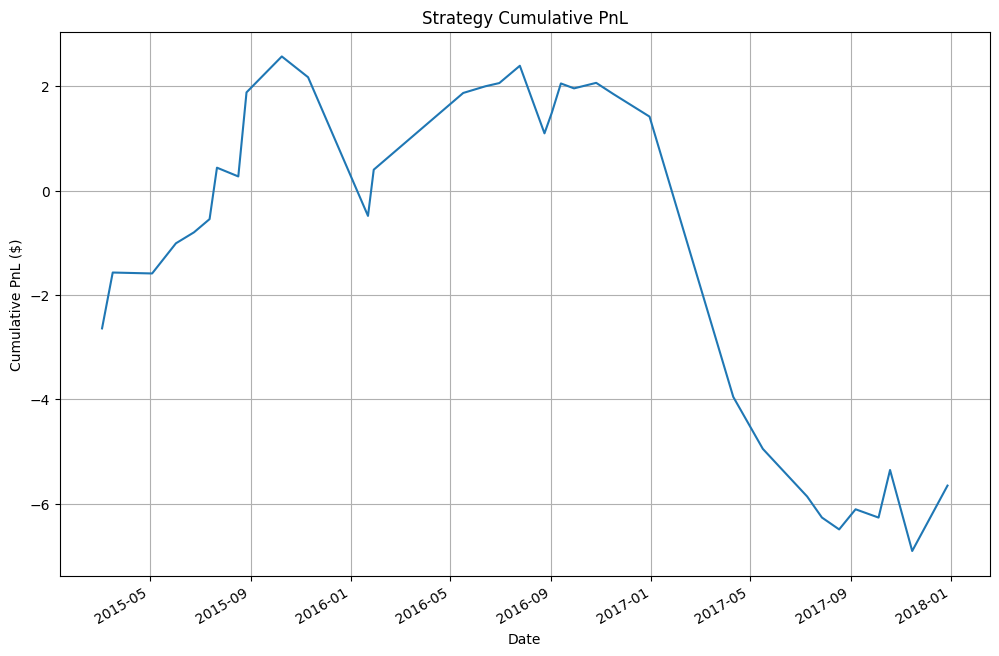

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Download and Prepare Data ---
print("Downloading and preparing data...")
df = yf.download(
    'AAPL',
    start='2015-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)

# FIX: Flatten the multi-level column headers into single-level names
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# --- 2. Calculate the Strategy Signal ---
lookback = 20
df['mean'] = df['Close'].rolling(lookback).mean()
df['std'] = df['Close'].rolling(lookback).std()
df.dropna(inplace=True)
df['z_score'] = (df['Close'] - df['mean']) / df['std']

# --- 3. Run the Backtest Simulation ---
print("Running backtest...")
buy_threshold = -1.5
sell_threshold = 1.5
trade_qty = 1
position = 0
pnl = []
trade_dates = []

for i in range(len(df)):
    z_score = df['z_score'].iloc[i]
    current_price = df['Close'].iloc[i]
    current_date = df.index[i]

    if z_score < buy_threshold and position == 0:
        position = 1
        entry_price = current_price
        print(f"{current_date.date()}: Opened long position at {entry_price:.2f}")

    elif z_score > sell_threshold and position == 0:
        position = -1
        entry_price = current_price
        print(f"{current_date.date()}: Opened short position at {entry_price:.2f}")

    elif abs(z_score) < 0.5 and position != 0:
        profit = (current_price - entry_price) * trade_qty * position
        pnl.append(profit)
        trade_dates.append(current_date)
        print(f"{current_date.date()}: Closed position at {current_price:.2f} for a PnL of {profit:.2f}")
        position = 0

# --- 4. Plot the Results ---
if pnl:
    df_rpnl = pd.DataFrame({'rpnl': pnl}, index=trade_dates)
    df_rpnl['rpnl_cumulative'] = df_rpnl['rpnl'].cumsum()

    df_rpnl['rpnl_cumulative'].plot(figsize=(12, 8), title="Strategy Cumulative PnL")
    plt.ylabel("Cumulative PnL ($)")
    plt.xlabel("Date")
    plt.grid(True)
    plt.show()
else:
    print("The strategy did not generate any completed trades.")

# Multiple runs of the backtest engine

In [ ]:
THRESHOLDS = [
    (-0.5, 0.5),
    (-1.5, 1.5),
    (-2.5, 2.0),
    (-1.5, 2.5),
]

Running backtest for all thresholds...


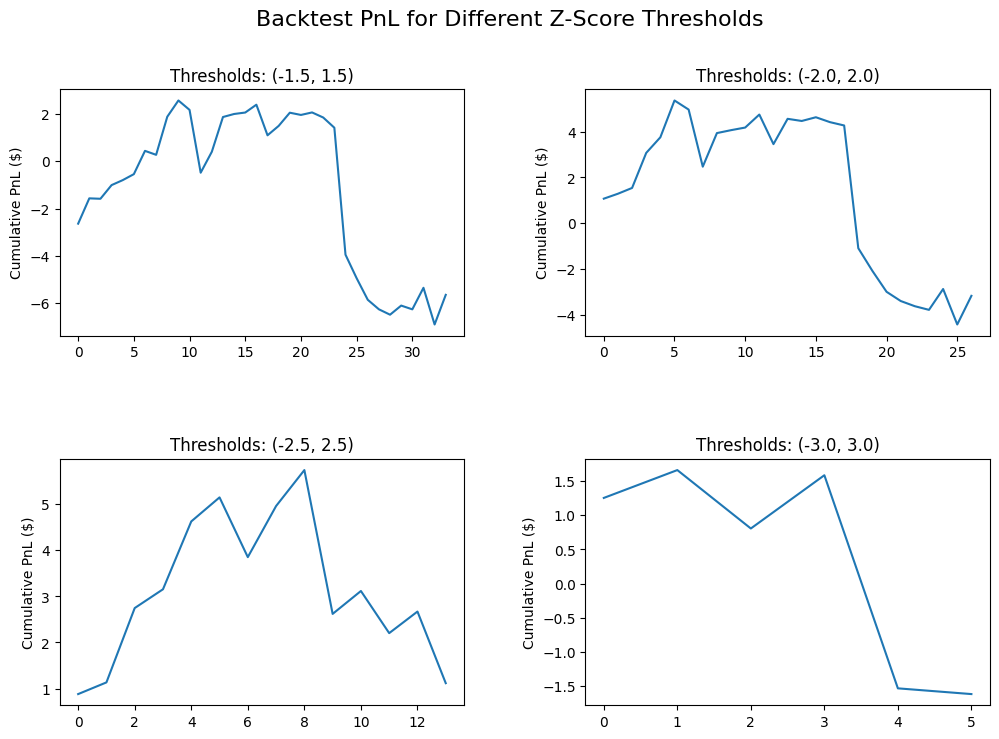

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Download and Prepare Data ---
print("Downloading and preparing data...")
df = yf.download(
    'AAPL',
    start='2015-01-01',
    end='2017-12-31',
    auto_adjust=True,
    progress=False
)

# FIX: Flatten the multi-level column headers into single-level names
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# --- 2. Define the Thresholds to Test ---
THRESHOLDS = [
    (-1.5, 1.5), (-2.0, 2.0),
    (-2.5, 2.5), (-3.0, 3.0)
]

# --- 3. Create Subplots for the Results ---
fig, axes = plt.subplots(nrows=len(THRESHOLDS)//2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Backtest PnL for Different Z-Score Thresholds', fontsize=16)

# --- 4. Loop Through Each Threshold and Run the Backtest ---
print("Running backtest for all thresholds...")

for i, (buy_threshold, sell_threshold) in enumerate(THRESHOLDS):

    # --- Backtesting Logic ---
    lookback = 20
    df_strategy = df.copy() # Use a copy to avoid modifying the original df
    df_strategy['mean'] = df_strategy['Close'].rolling(lookback).mean()
    df_strategy['std'] = df_strategy['Close'].rolling(lookback).std()
    df_strategy.dropna(inplace=True)
    df_strategy['z_score'] = (df_strategy['Close'] - df_strategy['mean']) / df_strategy['std']

    trade_qty = 1
    position = 0
    pnl = []

    for j in range(len(df_strategy)):
        z_score = df_strategy['z_score'].iloc[j]
        current_price = df_strategy['Close'].iloc[j]

        if z_score < buy_threshold and position == 0:
            position = 1
            entry_price = current_price
        elif z_score > sell_threshold and position == 0:
            position = -1
            entry_price = current_price
        elif abs(z_score) < 0.5 and position != 0:
            profit = (current_price - entry_price) * trade_qty * position
            pnl.append(profit)
            position = 0

    # --- Plotting the Results for this Threshold ---
    ax = axes.flatten()[i]
    if pnl:
        cumulative_pnl = pd.Series(pnl).cumsum()
        cumulative_pnl.plot(ax=ax, title=f'Thresholds: ({buy_threshold}, {sell_threshold})')
        ax.set_ylabel("Cumulative PnL ($)")
    else:
        ax.set_title(f'Thresholds: ({buy_threshold}, {sell_threshold}) - No Trades')

plt.show()